Coefficients: [-0.04292205 -0.00601983]
Intercept: 45.66846649309058
R^2 Score: 0.6909780979149382
Mean Squared Error: 19.36091994540336
Mean Absolute Error: 3.352488604575317
Adjusted R^2: 0.6861496306948591


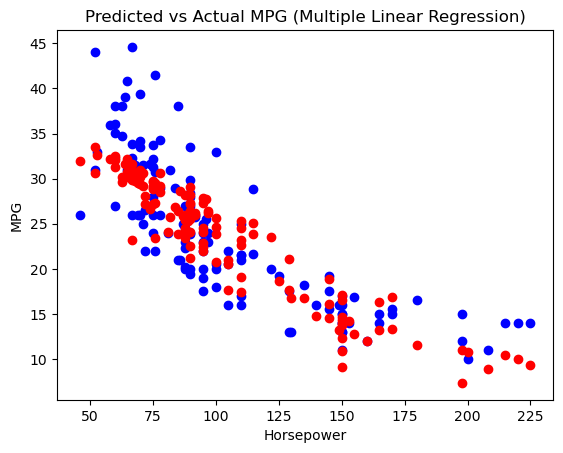

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
auto_mpg = sns.load_dataset('mpg').dropna()
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg = auto_mpg.dropna(subset=['horsepower'])

# Features and target
X = auto_mpg[['horsepower', 'weight']]
y = auto_mpg['mpg']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluate
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1)
print("Adjusted R^2:", adjusted_r2)

# Plot results
plt.scatter(X_test['horsepower'], y_test, color="blue")
plt.scatter(X_test['horsepower'], y_pred, color="red")
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Predicted vs Actual MPG (Multiple Linear Regression)')
plt.show()
